In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p, inv_boxcox1p

import warnings

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

sns.set_style("darkgrid")
fontpath = 'C:/Users/TaeSoo/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 6
pd.options.display.float_format = '{:.5f}'.format

warnings.filterwarnings(action='ignore')

In [2]:
application_train_df = pd.read_csv('application_train.csv')
application_test_df = pd.read_csv('application_test.csv')

In [3]:
# application_train_df.shape
# application_test_df.shape
target = application_train_df['TARGET']
application_train_df = application_train_df.drop(['TARGET'], axis = 1)
dataset = pd.concat([application_train_df, application_test_df])

In [4]:
# application_train_df.info(verbose=True, null_counts=True)
# application_test_df.info(verbose=True, null_counts=True)
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    356255 non-null  int64  
 1    NAME_CONTRACT_TYPE            356255 non-null  object 
 2    CODE_GENDER                   356255 non-null  object 
 3    FLAG_OWN_CAR                  356255 non-null  object 
 4    FLAG_OWN_REALTY               356255 non-null  object 
 5    CNT_CHILDREN                  356255 non-null  int64  
 6    AMT_INCOME_TOTAL              356255 non-null  float64
 7    AMT_CREDIT                    356255 non-null  float64
 8    AMT_ANNUITY                   356219 non-null  float64
 9    AMT_GOODS_PRICE               355977 non-null  float64
 10   NAME_TYPE_SUITE               354052 non-null  object 
 11   NAME_INCOME_TYPE              356255 non-null  object 
 12   NAME_EDUCATION_TYPE          

37
                              counts    ratio
COMMONAREA_MEDI               248360 69.71000
COMMONAREA_MODE               248360 69.71000
COMMONAREA_AVG                248360 69.71000
NONLIVINGAPARTMENTS_MODE      246861 69.29000
NONLIVINGAPARTMENTS_AVG       246861 69.29000
NONLIVINGAPARTMENTS_MEDI      246861 69.29000
FONDKAPREMONT_MODE            243092 68.24000
LIVINGAPARTMENTS_MEDI         242979 68.20000
LIVINGAPARTMENTS_AVG          242979 68.20000
LIVINGAPARTMENTS_MODE         242979 68.20000
FLOORSMIN_MEDI                241108 67.68000
FLOORSMIN_AVG                 241108 67.68000
FLOORSMIN_MODE                241108 67.68000
YEARS_BUILD_AVG               236306 66.33000
YEARS_BUILD_MEDI              236306 66.33000
YEARS_BUILD_MODE              236306 66.33000
OWN_CAR_AGE                   235241 66.03000
LANDAREA_AVG                  210844 59.18000
LANDAREA_MODE                 210844 59.18000
LANDAREA_MEDI                 210844 59.18000
BASEMENTAREA_MEDI             2

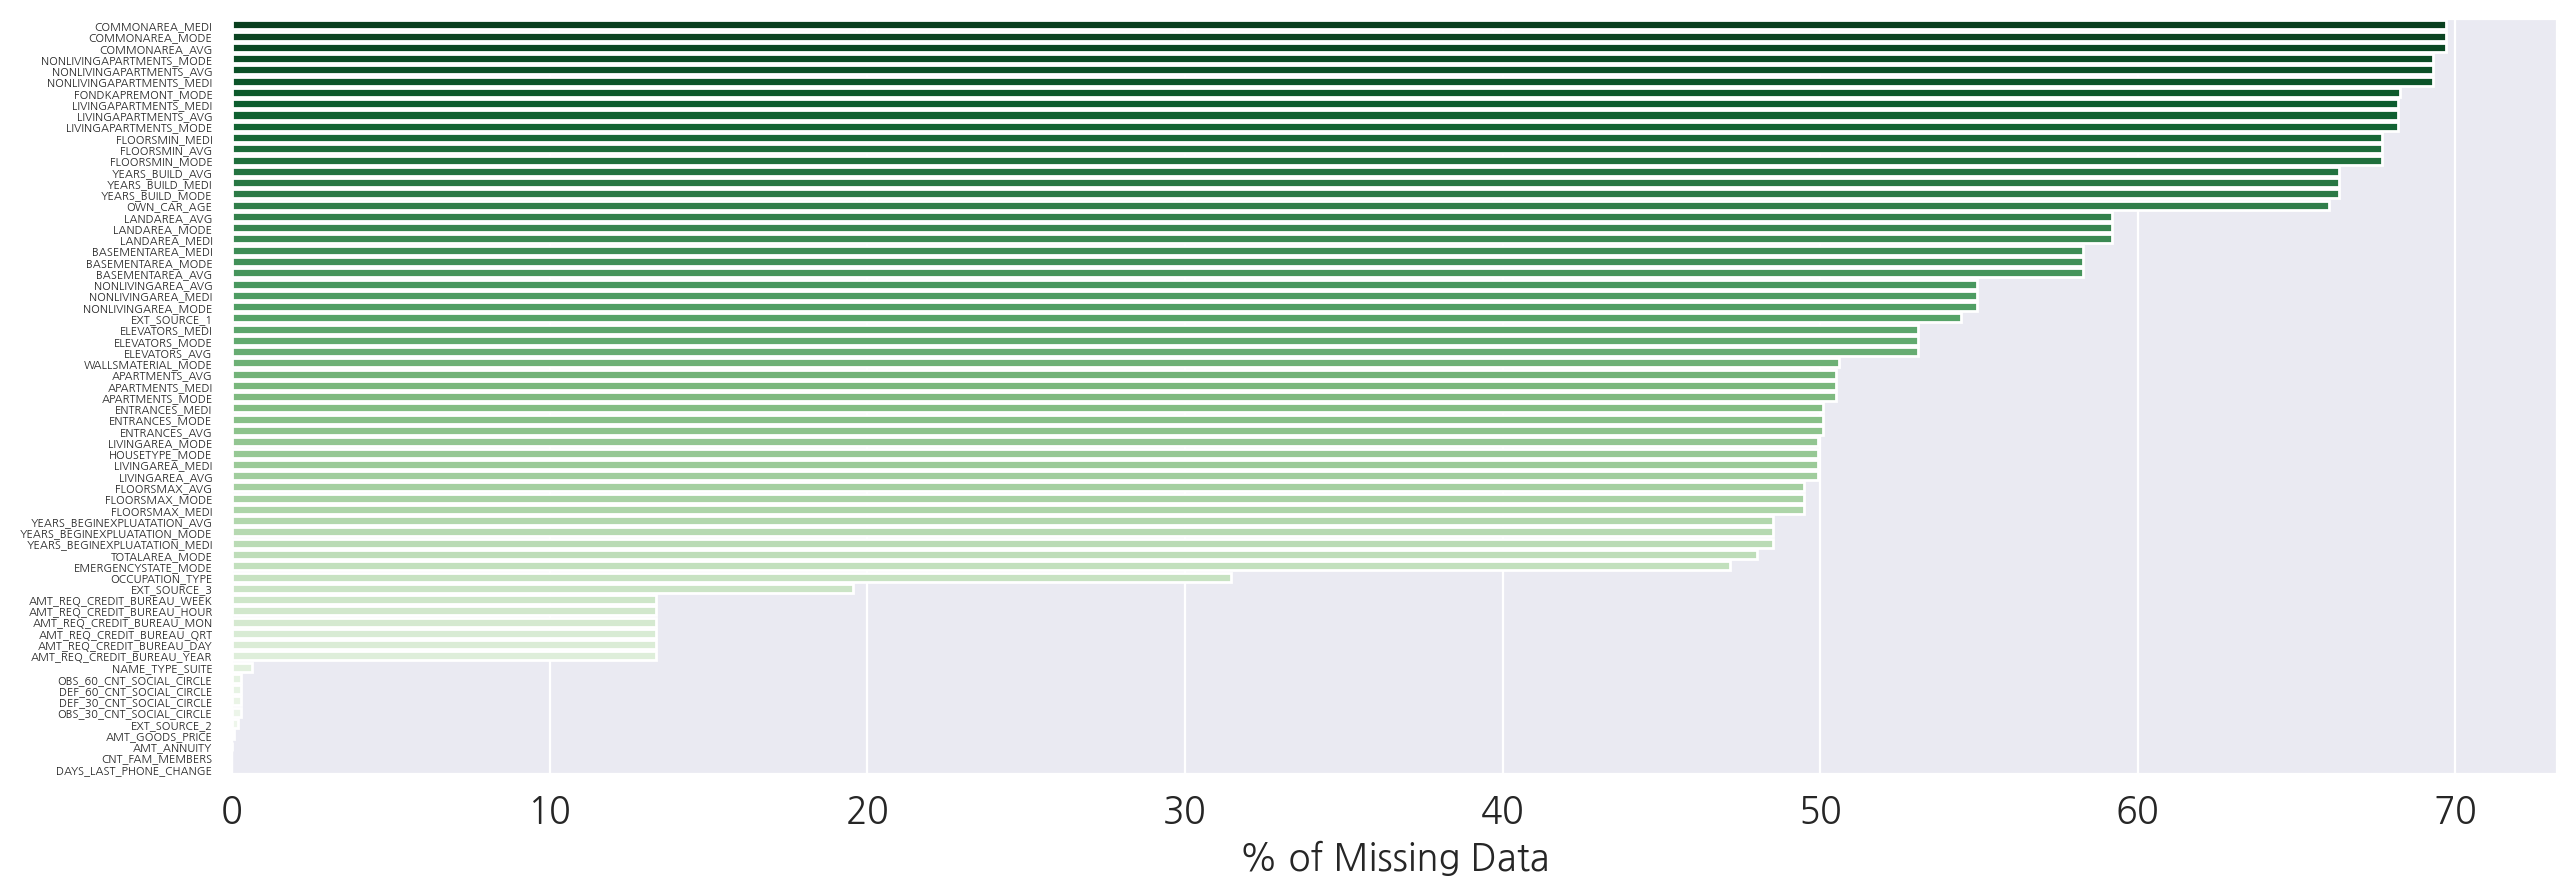

In [9]:
# df : application_train_df / application_test_df / dataset

df = dataset

na_value_counts = df.isnull().sum()
na_value_counts.drop(na_value_counts[na_value_counts == 0].index, inplace = True)
na_value_ratio = round((df.isnull().sum()/len(df)) * 100, 2)
na_value_ratio.drop(na_value_ratio[na_value_ratio == 0].index, inplace = True)
na_df = pd.concat(objs = [na_value_counts, na_value_ratio], axis = 1)
na_df.columns = ['counts', 'ratio']
na_df.sort_values(by = ['ratio'], axis = 0, ascending = False, inplace = True)
print(len(na_df[na_df['ratio'] >= 50]))
print(na_df)

plt.figure(figsize = (15,5))
sns.barplot(x = na_df['ratio'], y = na_df.index, data = na_df, palette = "Greens_r")
plt.xticks(fontsize = 13)
plt.xlabel('% of Missing Data', fontsize = 13)
plt.yticks(fontsize = 4)
plt.show()

In [18]:
dataset.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,356255.00000,356255,356255,356255,356255,356255.00000,356255.00000,356255.00000,356219.00000,355977.00000,354052,356255,356255,356255,356255,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,121014.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,244259,356253.00000,356255.00000,356255.00000,356255,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255,162345.00000,355587.00000,286622.00000,176307.00000,148671.00000,183392.00000,119949.00000,107895.00000,167175.00000,177848.00000,...,176307.00000,148671.00000,183392.00000,119949.00000,107895.00000,167175.00000,177848.00000,179914.00000,115147.00000,145411.00000,113276.00000,178353.00000,109394.00000,160489.00000,113163,178339,185200.00000,176021,188291,355205.00000,355205.00000,355205.00000,355205.00000,356254.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,356255.00000,308687.00000,308687.00000,308687.00000,308687.00000,308687.00000,308687.00000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,326537,235126,235235,246970,NaN,NaN,NaN,NaN,NaN,

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

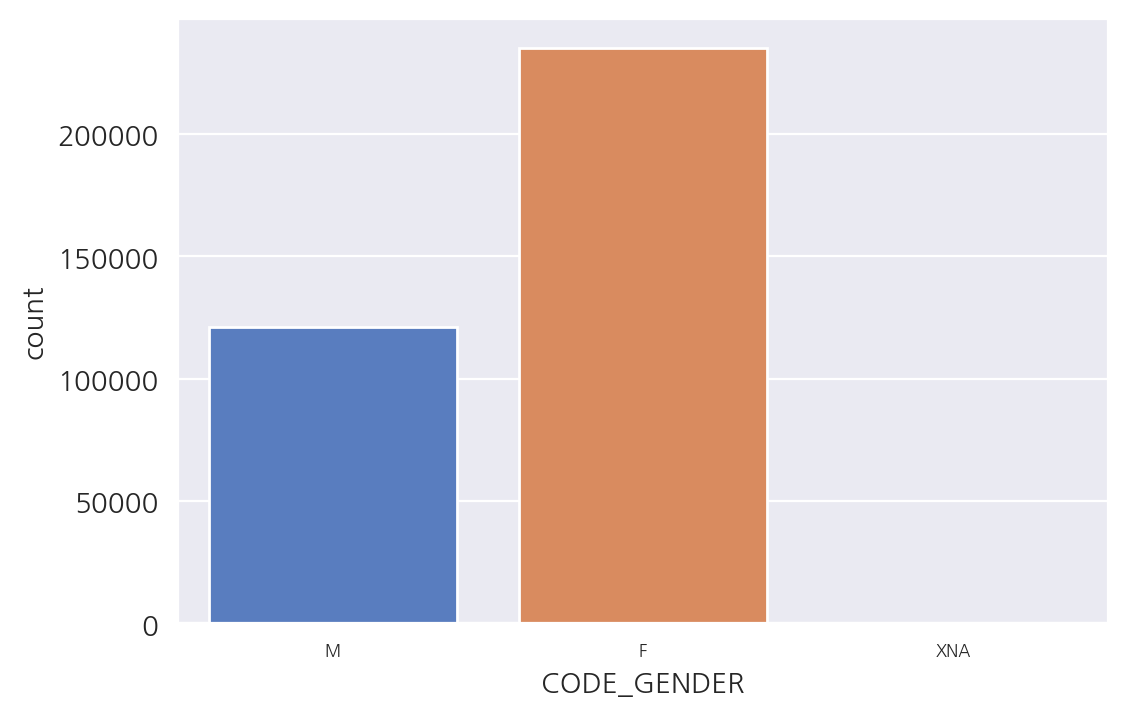

In [11]:
sns.countplot(dataset['CODE_GENDER'], palette = 'muted')

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

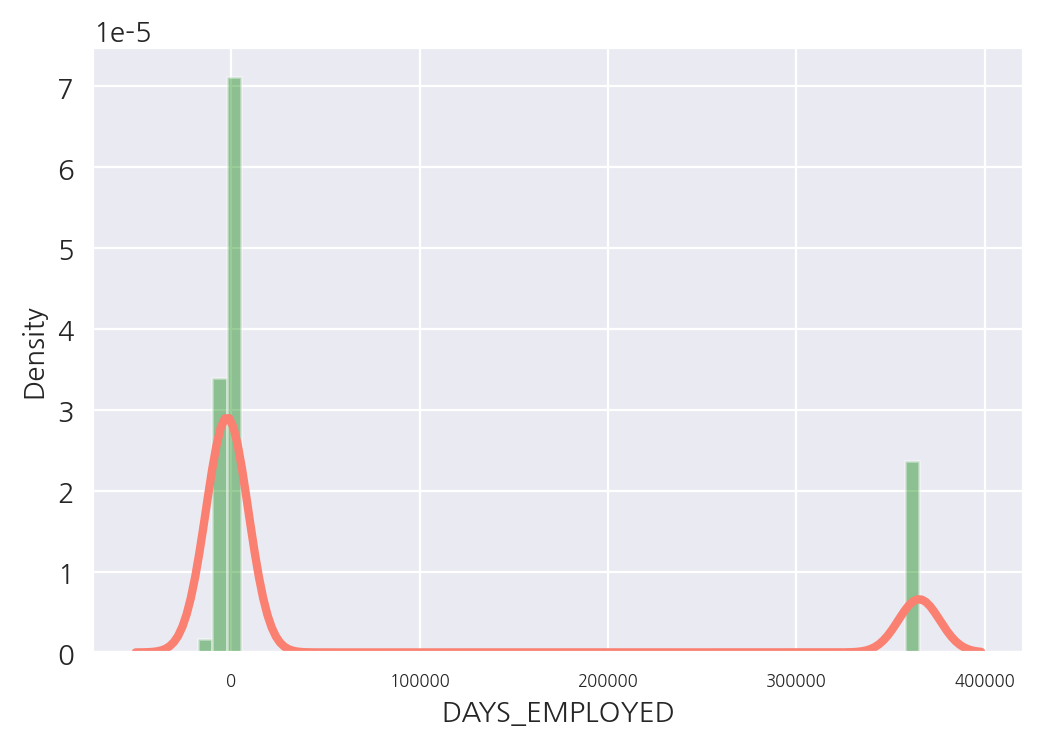

In [16]:
pd.options.display.float_format = '{:.5f}'.format
mpl.rcParams['axes.unicode_minus'] = False

sns.distplot(dataset['DAYS_EMPLOYED'], kde_kws = {'color' : 'salmon', 'lw' : 3}, hist_kws = {'color' : 'green'})

#### 확인된 이상치  

CODE_GENDER (성별) : 남자, 여자가 아닌 성별을 알 수 없는 경우의 데이터가 존재하였음 (test에서도 동일하게 성별을 식별할 수 없는 경우가 있으므로 따로 이상치를 처리하지 않았다.)
DAYS_BIRTH (신청한 날 고객의 나이) : 음수 표기  
DAYS_EMPLOYED (신청일 기준 현재 직장에서 일한 일 수) : 음수 표기  
DAYS_REGISTRATION (고객이 등록 서류를 변겅한 일 수, 신청일 기준) : 음수 표기  
DAYS_ID_PUBLISH (고객이 대출한 동안 신분증 문서를 변경한 일, 신청일 기준) : 음수 표기  
DAYS_LAST_PHONE_CHANGE (고객이 신청일 기준 핸드폰 변경했던 일 수) : 음수 표기  

In [19]:
# target.drop(dataset[(dataset['CODE_GENDER'] != 'F') & (dataset['CODE_GENDER'] != 'M')].index, axis = 0, inplace = True)
# dataset.drop(dataset[(dataset['CODE_GENDER'] != 'F') & (dataset['CODE_GENDER'] != 'M')].index, axis = 0, inplace = True)
dataset['AGE'] = abs(dataset['DAYS_BIRTH'] / 365)
dataset = dataset.drop(['DAYS_BIRTH'], axis = 1)
dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].replace(365243, np.nan)
dataset['DAYS_EMPLOYED'] = abs(dataset['DAYS_EMPLOYED'])
dataset['DAYS_REGISTRATION'] = abs(dataset['DAYS_REGISTRATION'])
dataset['DAYS_ID_PUBLISH'] = abs(dataset['DAYS_ID_PUBLISH'])
dataset['DAYS_LAST_PHONE_CHANGE'] = abs(dataset['DAYS_LAST_PHONE_CHANGE'])

'DAYS_BIRTH'는 신청한 날을 기준으로 나이를 표현하기 때문에 음수로 표기된다.  
나이대별 행동, 성향 분석이나 고객 이탈 예측 모델링 등에서 사용될 때 나이 전처리가 필요하기 때문에 수행하였다.  

'DAYS_EMPLOYED'는 통계치 관찰에서 최댓값이 365243일이라고 되어 있지만 이는 1000년이 넘는 기간이므로 이상치가 발생했다는 것을 알 수 있다.  
또한 365243이라는 특정 값이 60000개의 데이터에서 동일하게 나타난 것으로 보아, 시스템적 오류 혹은 기입 과정에서의 오류가 발생했을 가능성이 크며 개선이 필요해보인다.  
이상치는 결측치로 처리하였으며 결측치들을 자동으로 처리해주는 부스팅 계열에 머신러닝 모델을 사용할 것이라 따로 처리하지는 않았다.

5개의 변수는 음수로 표기되어 있으므로 모델이 데이터를 잘 학습하기 위한 스케일링 과정에 어려움이 있다.  
따라서 변수들의 값을 양수로 전처리하였다.

### 상관관계 분석

In [20]:
temp_train = dataset.iloc[:len(application_train_df),:]
temp_train = pd.concat([temp_train, target], axis = 1)

In [21]:
temp_df = temp_train.copy()
temp_df_object_cols = temp_df.dtypes[temp_df.dtypes == 'O'].index

for col in temp_df_object_cols:
    lbl = LabelEncoder() 
    temp_df[col] = lbl.fit_transform(list(temp_df[col].values)) 

temp_df_cols = temp_df.columns[:] 
temp_df_cor = abs(temp_df[temp_df_cols].corr(method = 'spearman'))
temp_df_cor = pd.DataFrame(temp_df_cor['TARGET']).sort_values('TARGET', ascending = False)
temp_df_cor.columns = ['corr']

<AxesSubplot:>

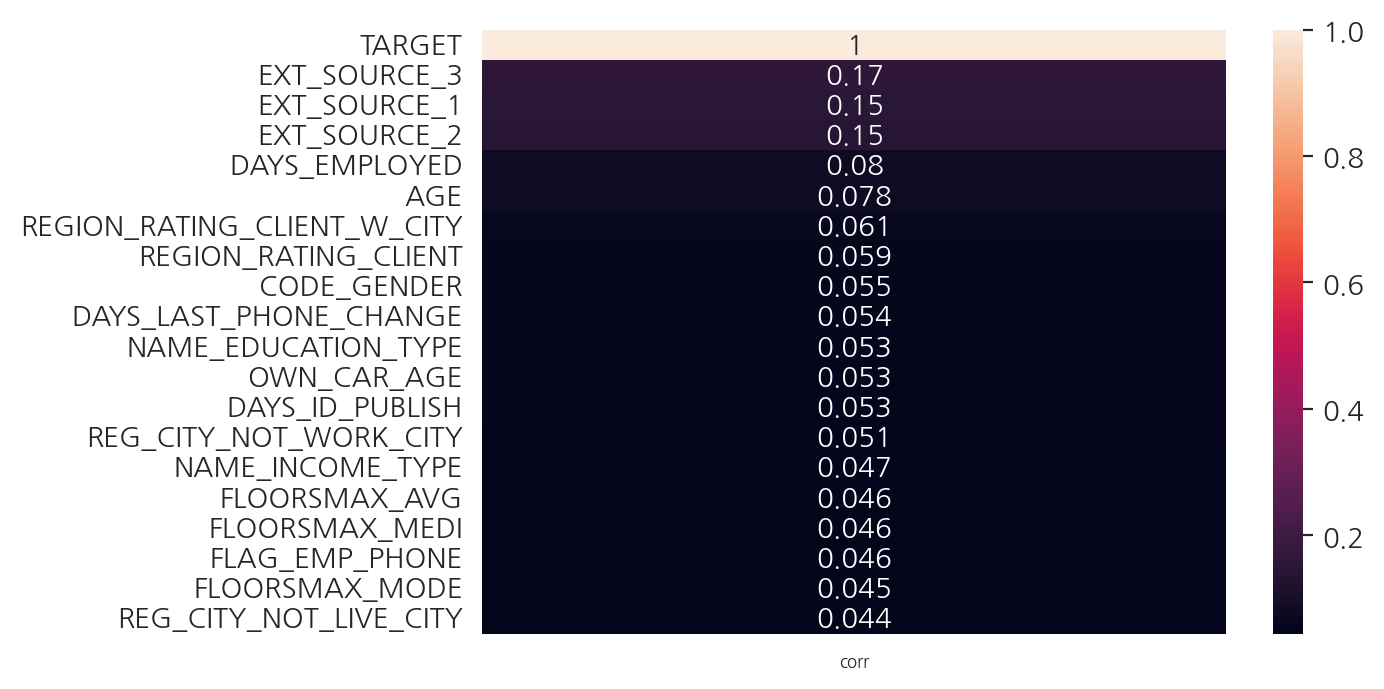

In [22]:
sns.heatmap(temp_df_cor[:20], annot=True)

### 시각화 분석

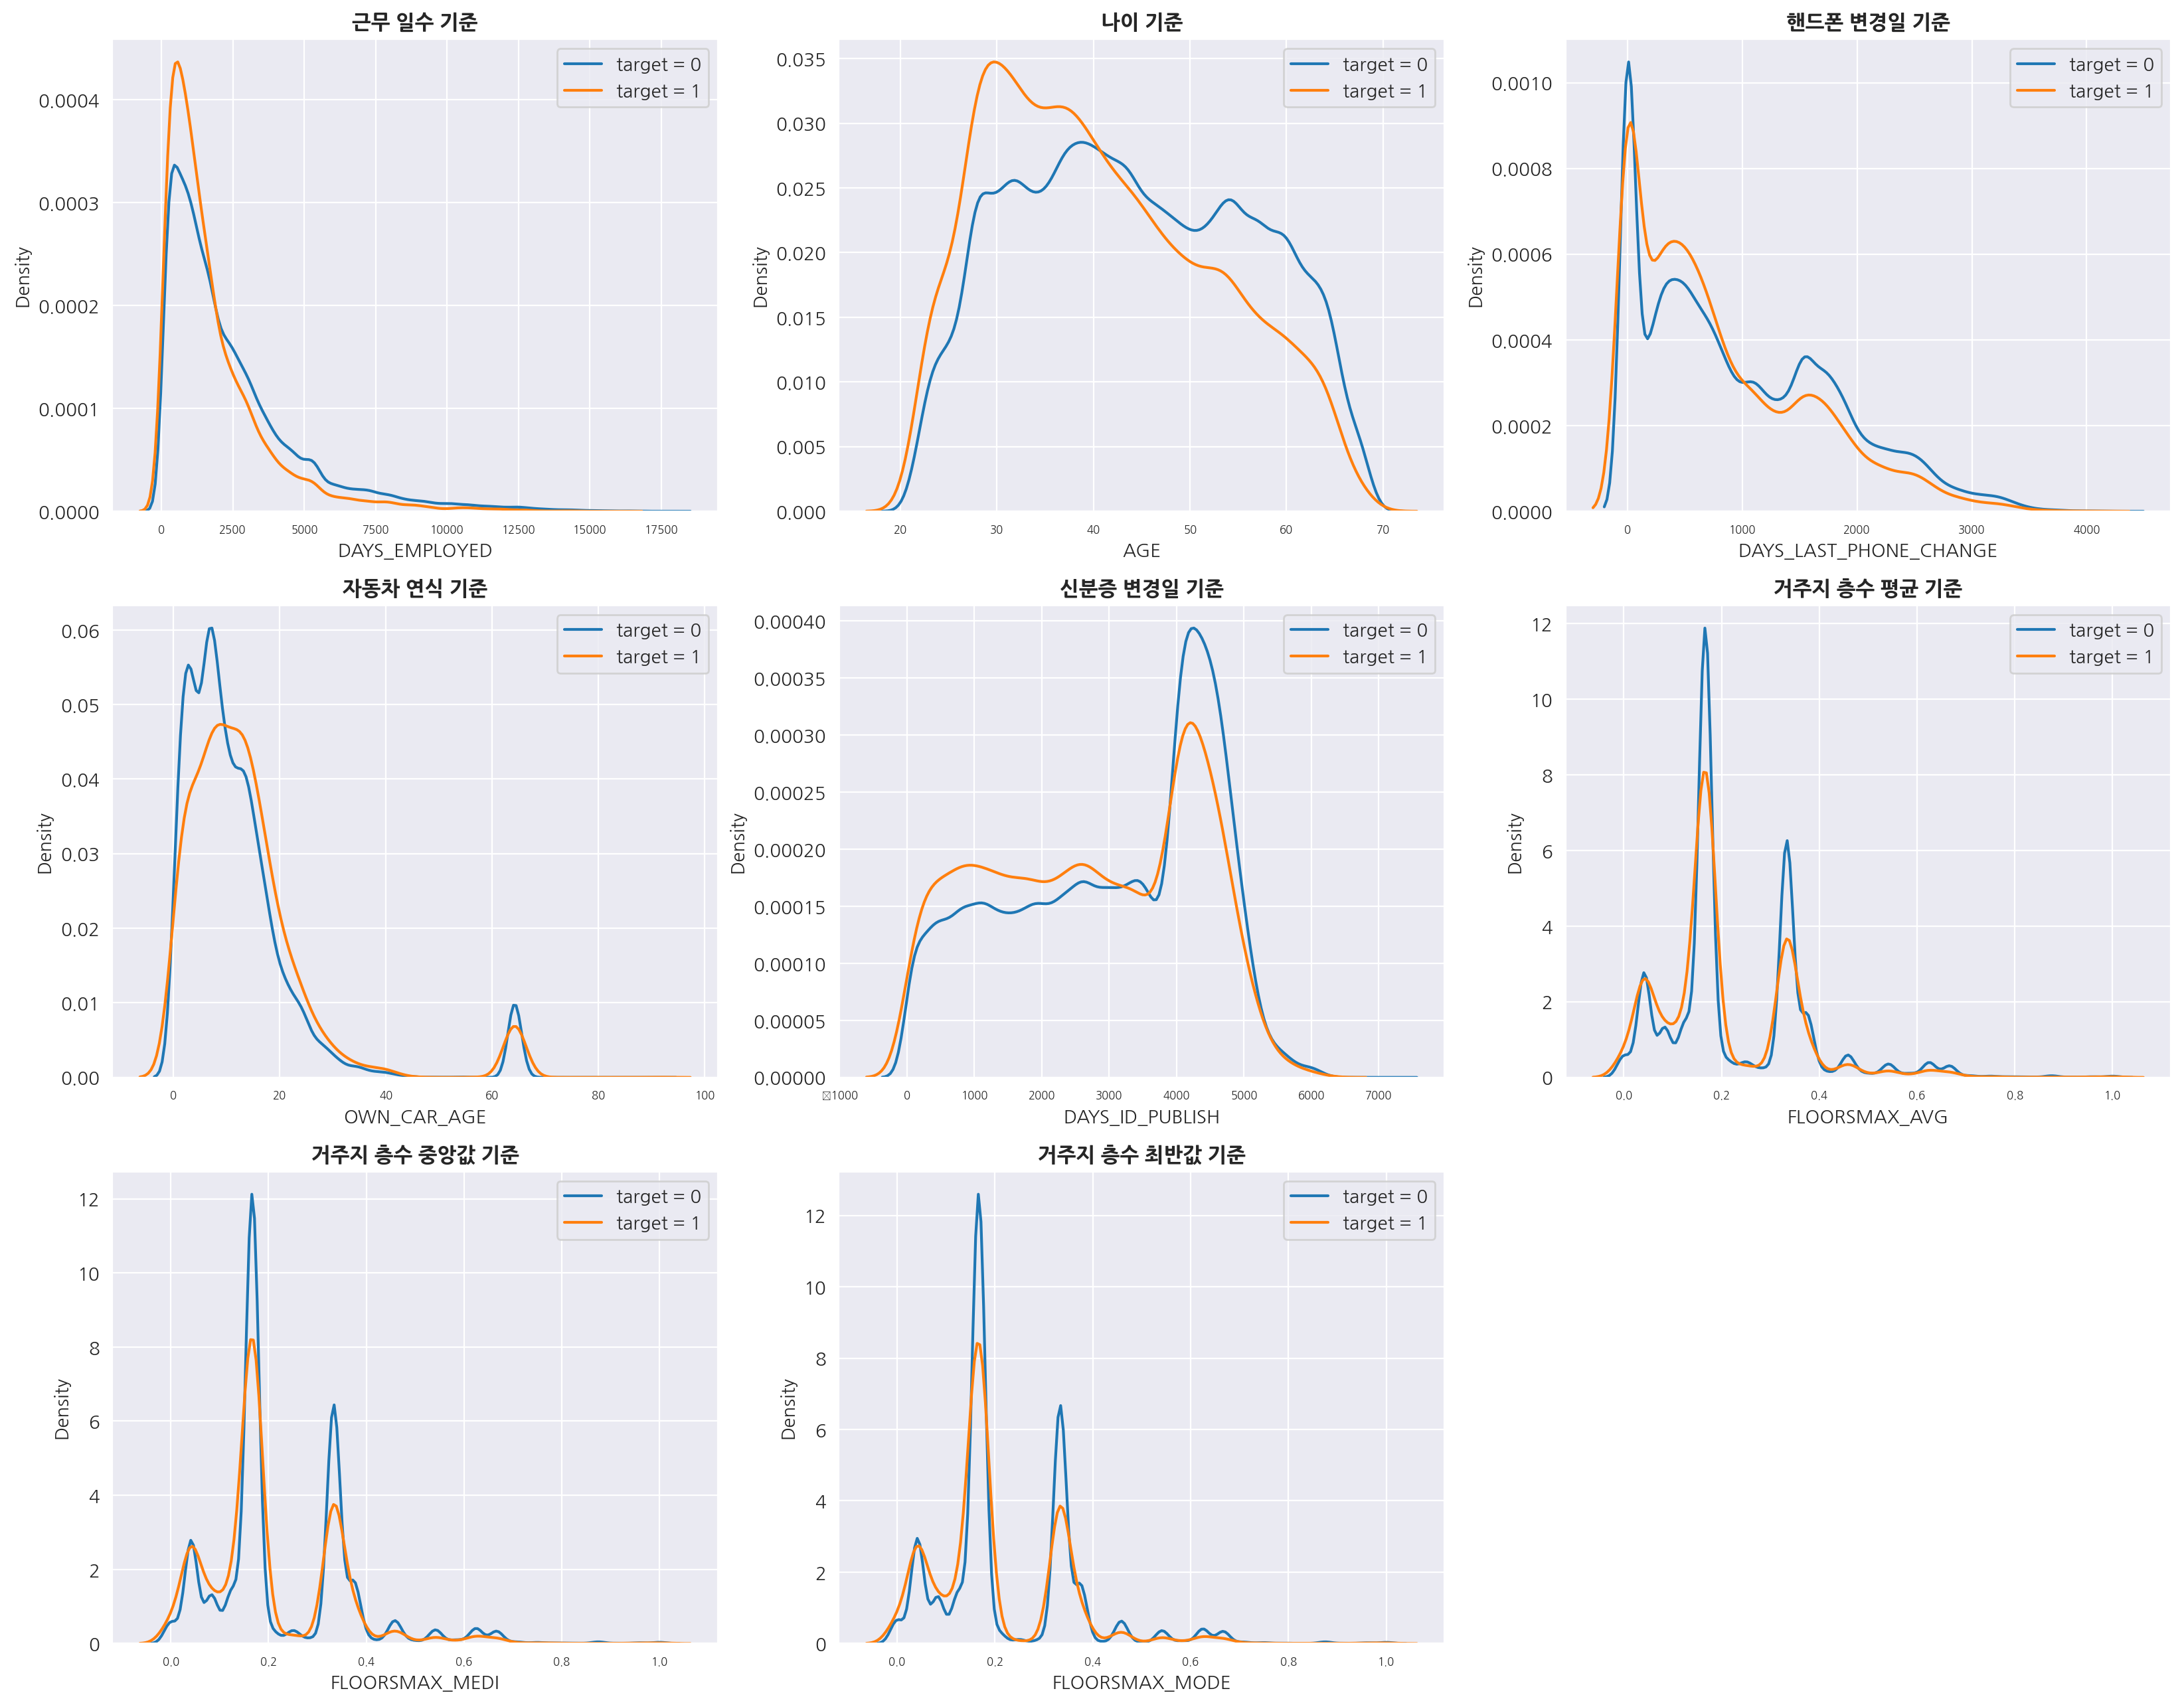

In [23]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(nrows=3, ncols=3,
                       height_ratios=[5, 5, 5], 
                       width_ratios=[5, 5, 5])

ax = plt.subplot(gs[0])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'DAYS_EMPLOYED'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'DAYS_EMPLOYED'], label = 'target = 1')
ax.set_title('근무 일수 기준', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

ax = plt.subplot(gs[1])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'AGE'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'AGE'], label = 'target = 1')
ax.set_title('나이 기준', fontsize=11, fontweight = 'bold')
plt.legend(loc = 'best')

ax = plt.subplot(gs[2])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'DAYS_LAST_PHONE_CHANGE'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'DAYS_LAST_PHONE_CHANGE'], label = 'target = 1')
ax.set_title('핸드폰 변경일 기준', fontsize=11, fontweight = 'bold')
plt.legend(loc = 'best')

ax = plt.subplot(gs[3])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'OWN_CAR_AGE'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'OWN_CAR_AGE'], label = 'target = 1')
ax.set_title('자동차 연식 기준', fontsize=11, fontweight = 'bold')       
# ax.get_xaxis().get_major_formatter().set_scientific(False)            
plt.legend(loc = 'best')

ax = plt.subplot(gs[4])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'DAYS_ID_PUBLISH'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'DAYS_ID_PUBLISH'], label = 'target = 1')
ax.set_title('신분증 변경일 기준', fontsize=11, fontweight = 'bold')
# ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.legend(loc = 'best')

ax = plt.subplot(gs[5])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'FLOORSMAX_AVG'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'FLOORSMAX_AVG'], label = 'target = 1')
ax.set_title('거주지 층수 평균 기준', fontsize=11, fontweight = 'bold')
plt.legend(loc = 'best')

ax = plt.subplot(gs[6])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'FLOORSMAX_MEDI'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'FLOORSMAX_MEDI'], label = 'target = 1')
ax.set_title('거주지 층수 중앙값 기준', fontsize=11, fontweight = 'bold')
plt.legend(loc = 'best')

ax = plt.subplot(gs[7])
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 0, 'FLOORSMAX_MODE'], label = 'target = 0')
sns.kdeplot(temp_df.loc[temp_df['TARGET'] == 1, 'FLOORSMAX_MODE'], label = 'target = 1')
ax.set_title('거주지 층수 최반값 기준', fontsize=11, fontweight = 'bold')
plt.legend(loc = 'best')

plt.show()

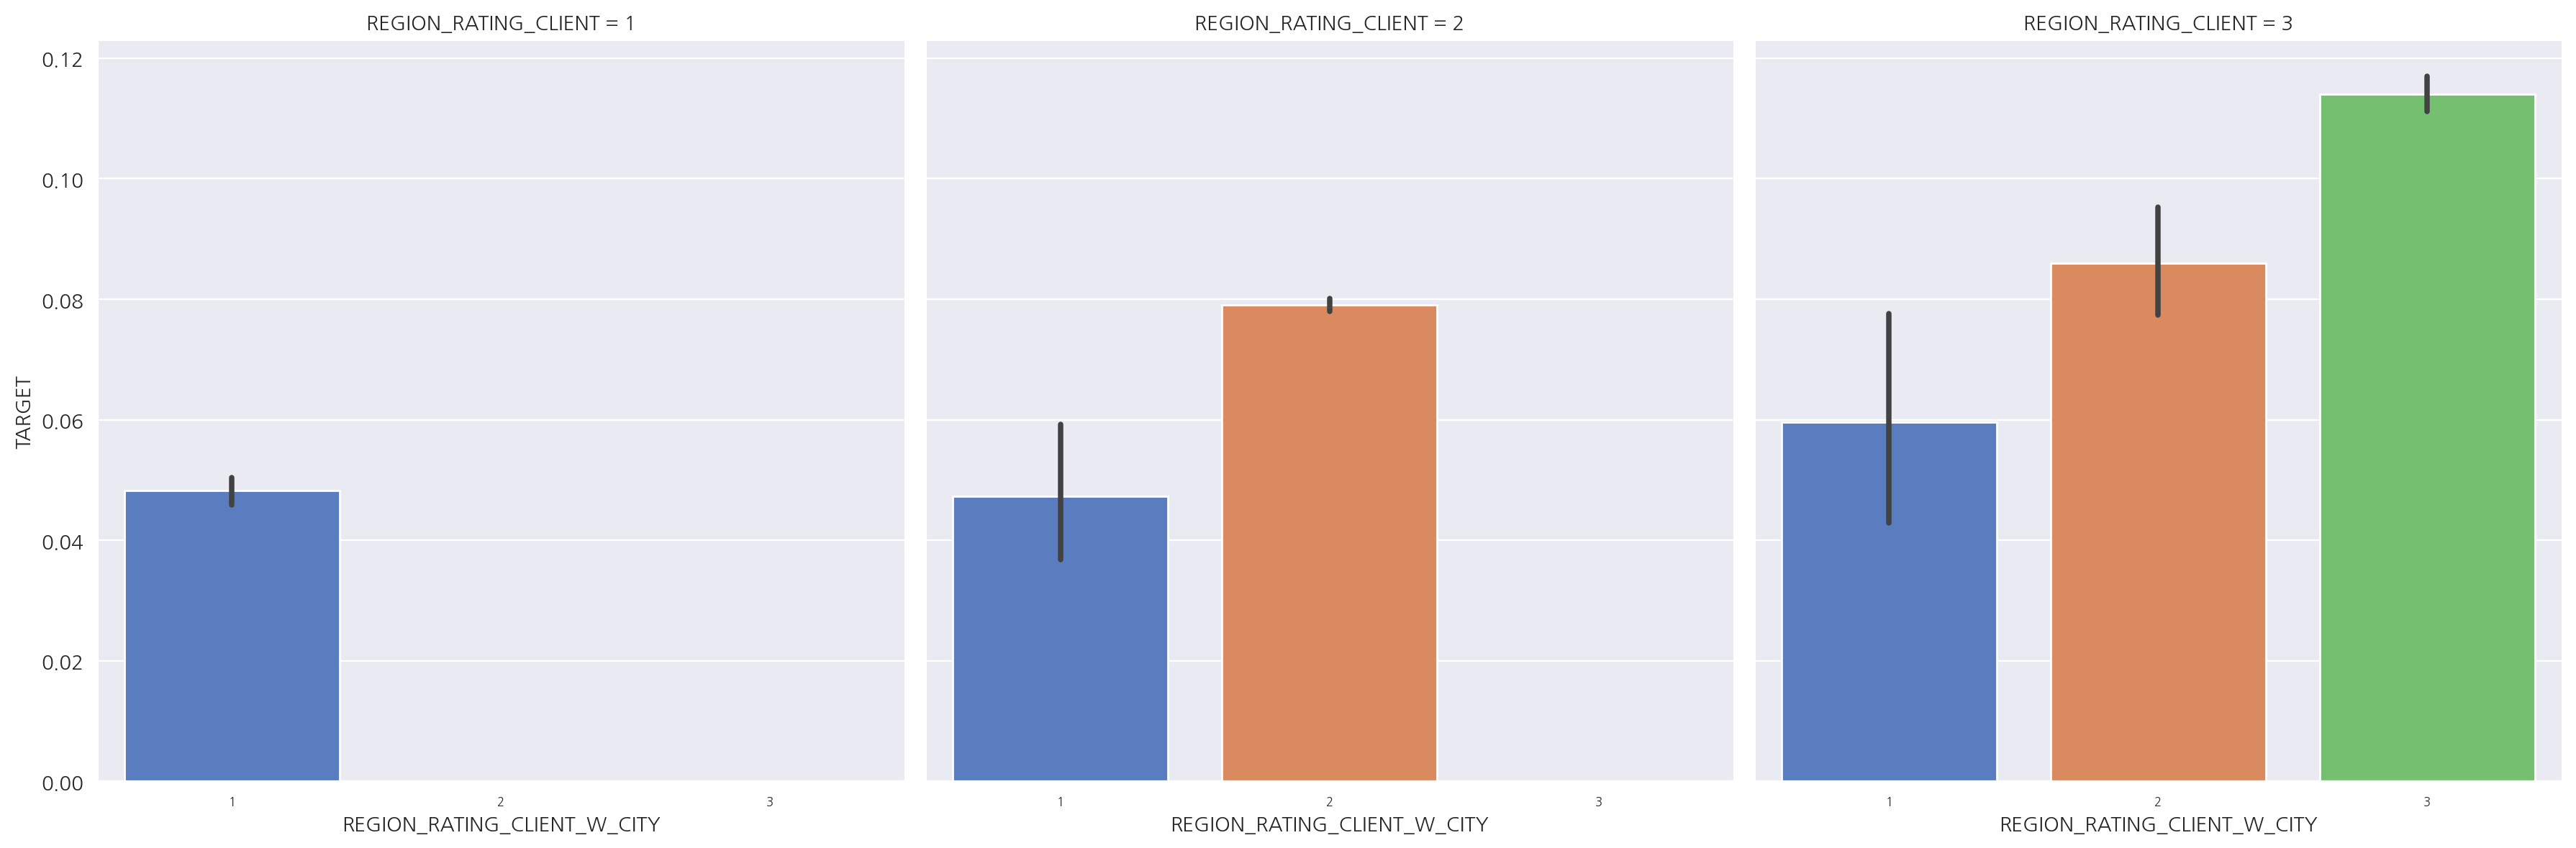

In [24]:
# sns.countplot(temp_train['REGION_RATING_CLIENT'], palette = 'muted')
# sns.countplot(temp_train['REGION_RATING_CLIENT_W_CITY'], palette = 'muted')
sns.catplot(x = 'REGION_RATING_CLIENT_W_CITY', y = 'TARGET', data = temp_train, kind = 'bar', col = 'REGION_RATING_CLIENT', height = 6, palette = 'muted')

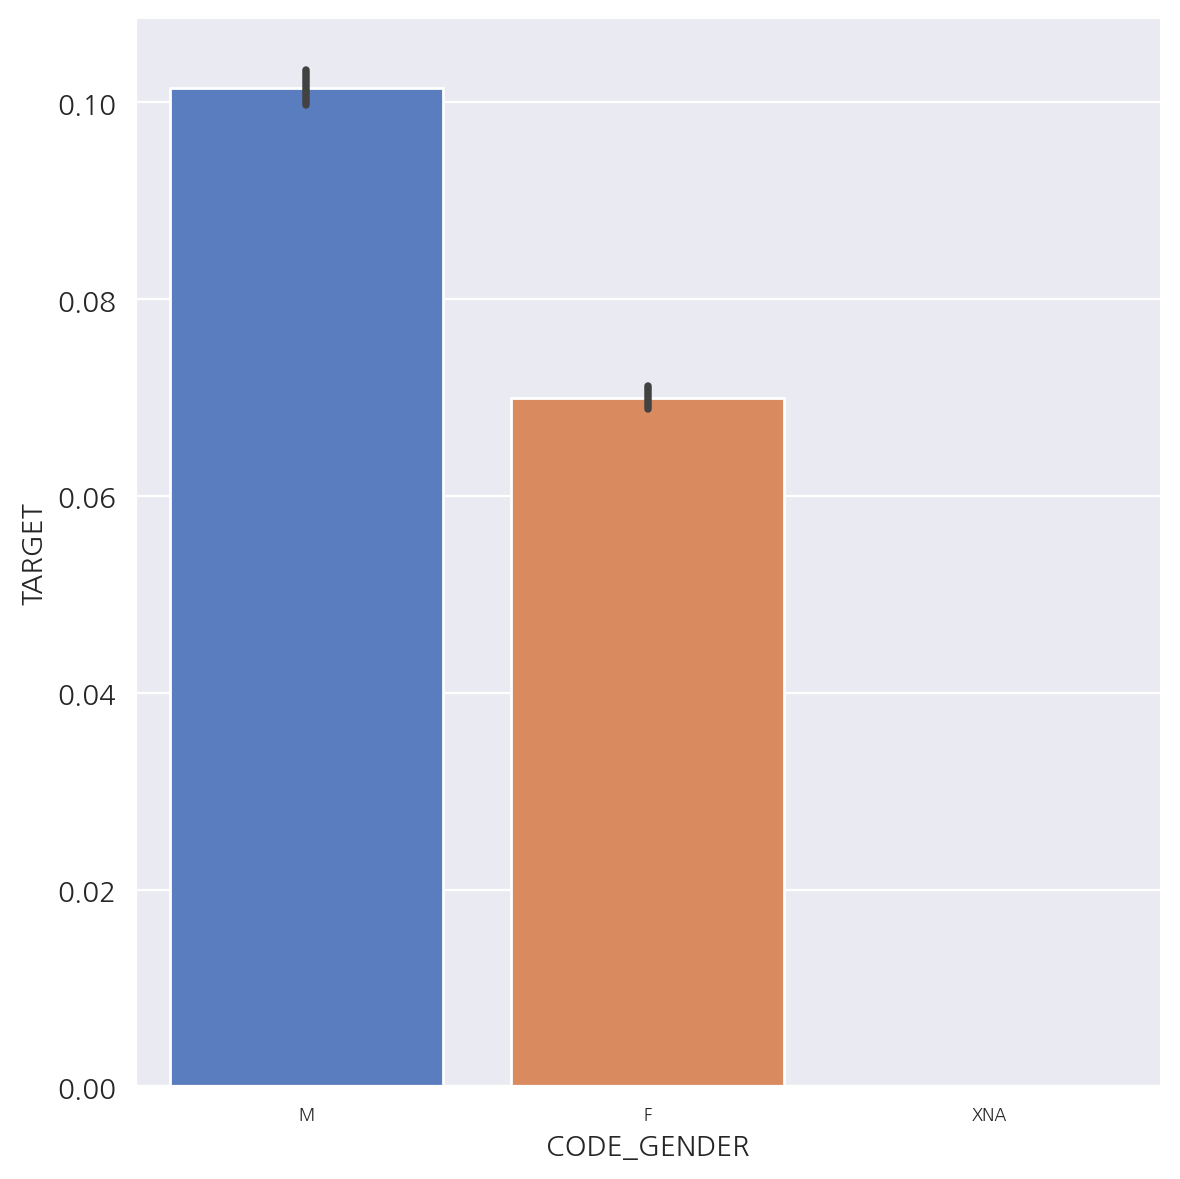

In [25]:
# sns.countplot(temp_train['CODE_GENDER'], palette = 'muted')
sns.catplot(x = 'CODE_GENDER', y = 'TARGET', data = temp_train, kind = 'bar', height = 6, palette = 'muted')

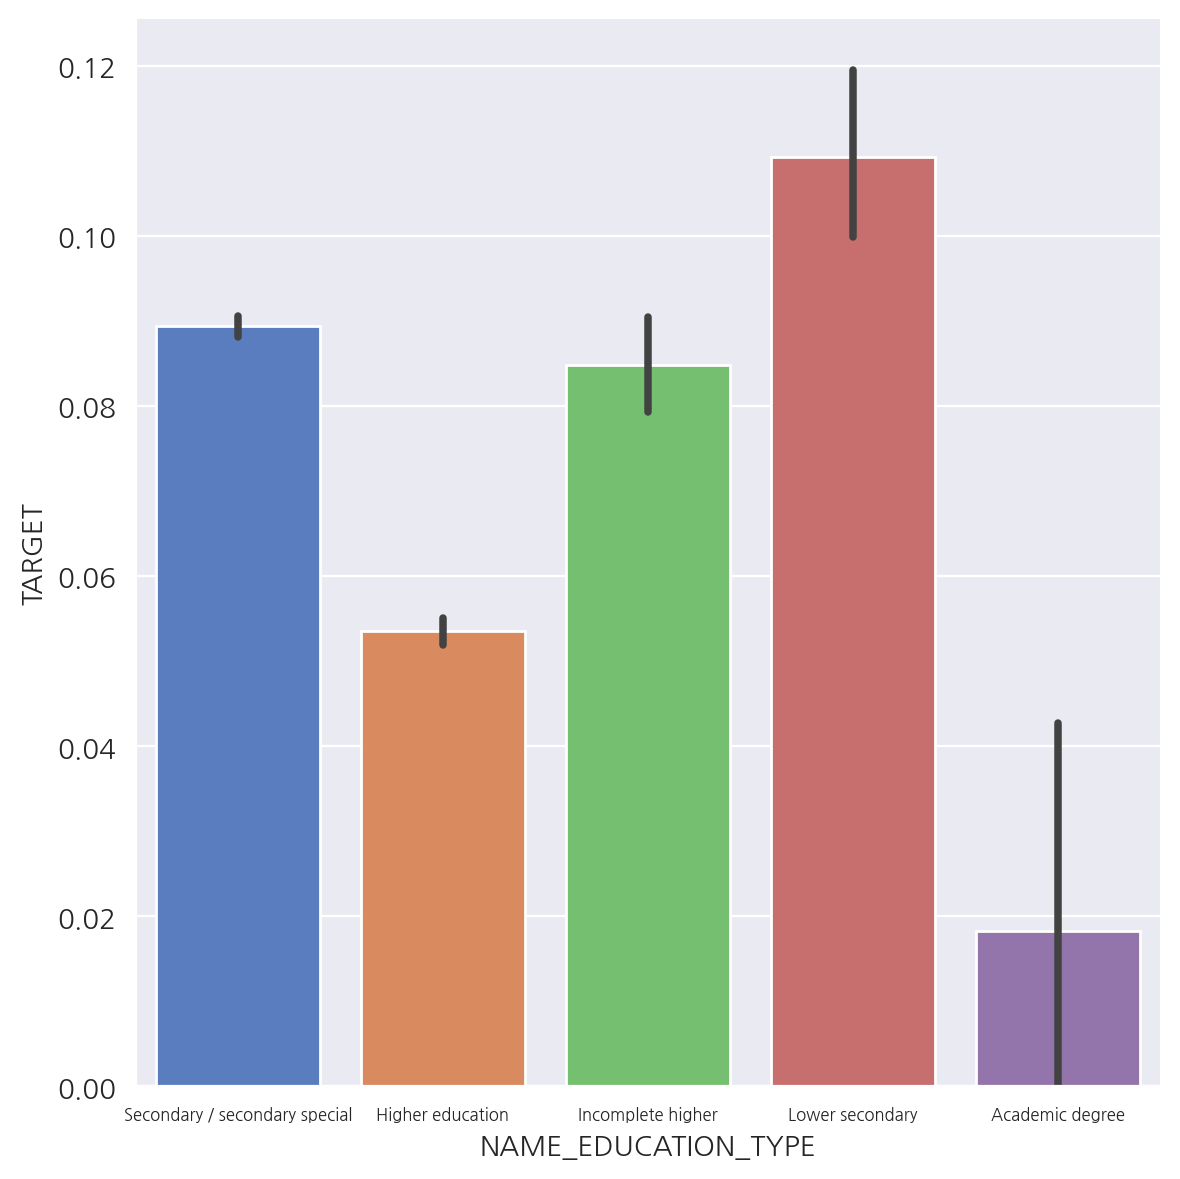

In [26]:
# sns.countplot(temp_train['NAME_EDUCATION_TYPE'], palette = 'muted')
sns.catplot(x = 'NAME_EDUCATION_TYPE', y = 'TARGET', data = temp_train, kind = 'bar', height = 6, palette = 'muted')

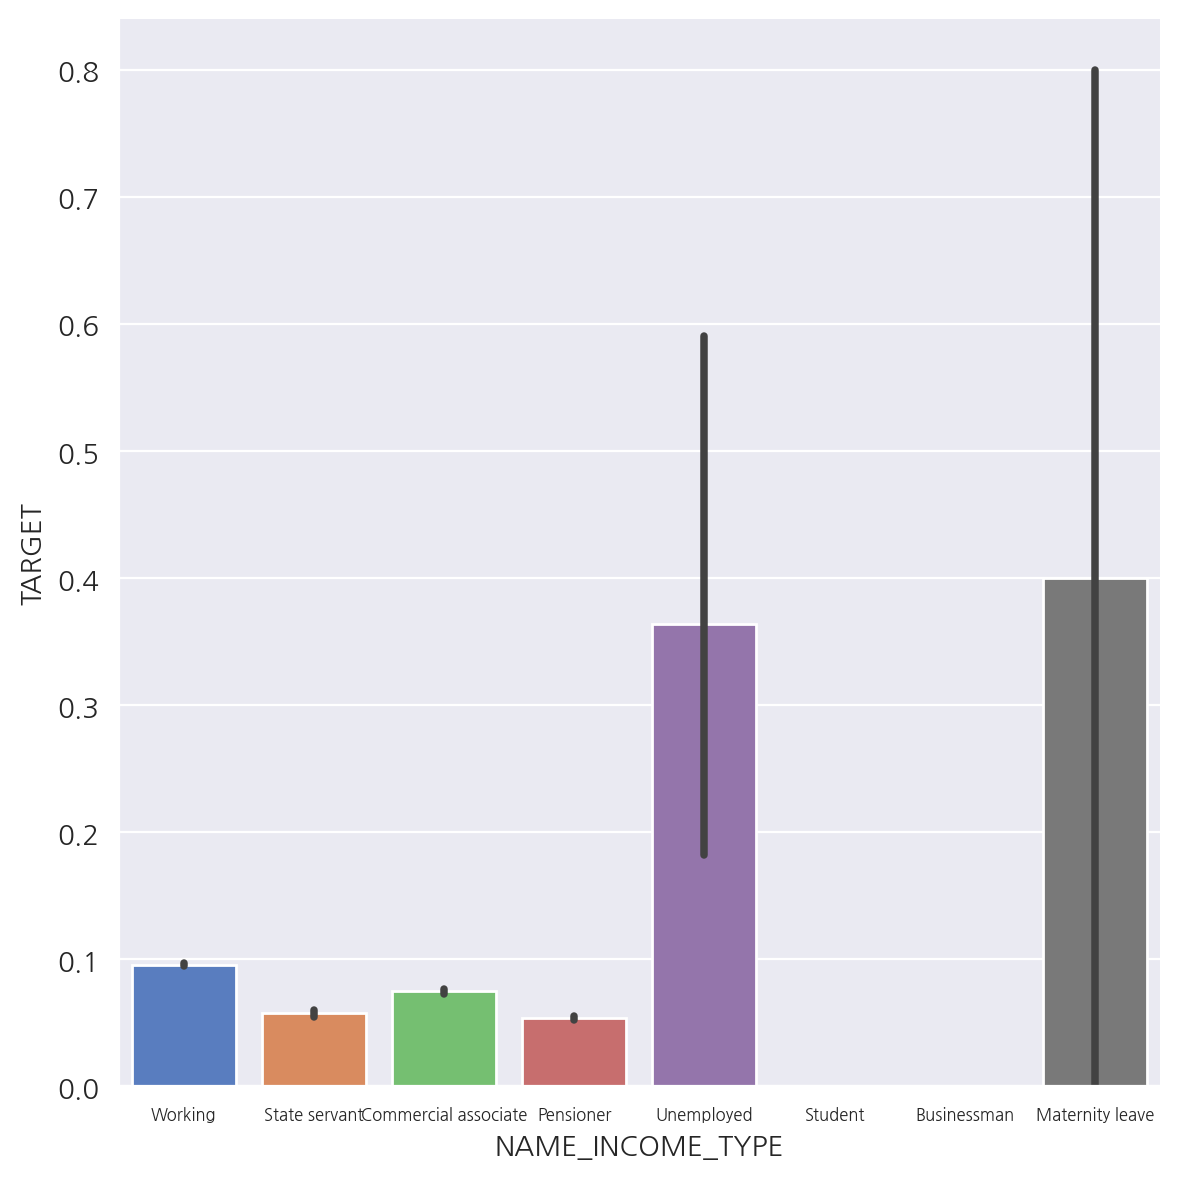

In [27]:
# sns.countplot(temp_train['NAME_INCOME_TYPE'], palette = 'muted')
sns.catplot(x = 'NAME_INCOME_TYPE', y = 'TARGET', data = temp_train, kind = 'bar', height = 6, palette = 'muted')

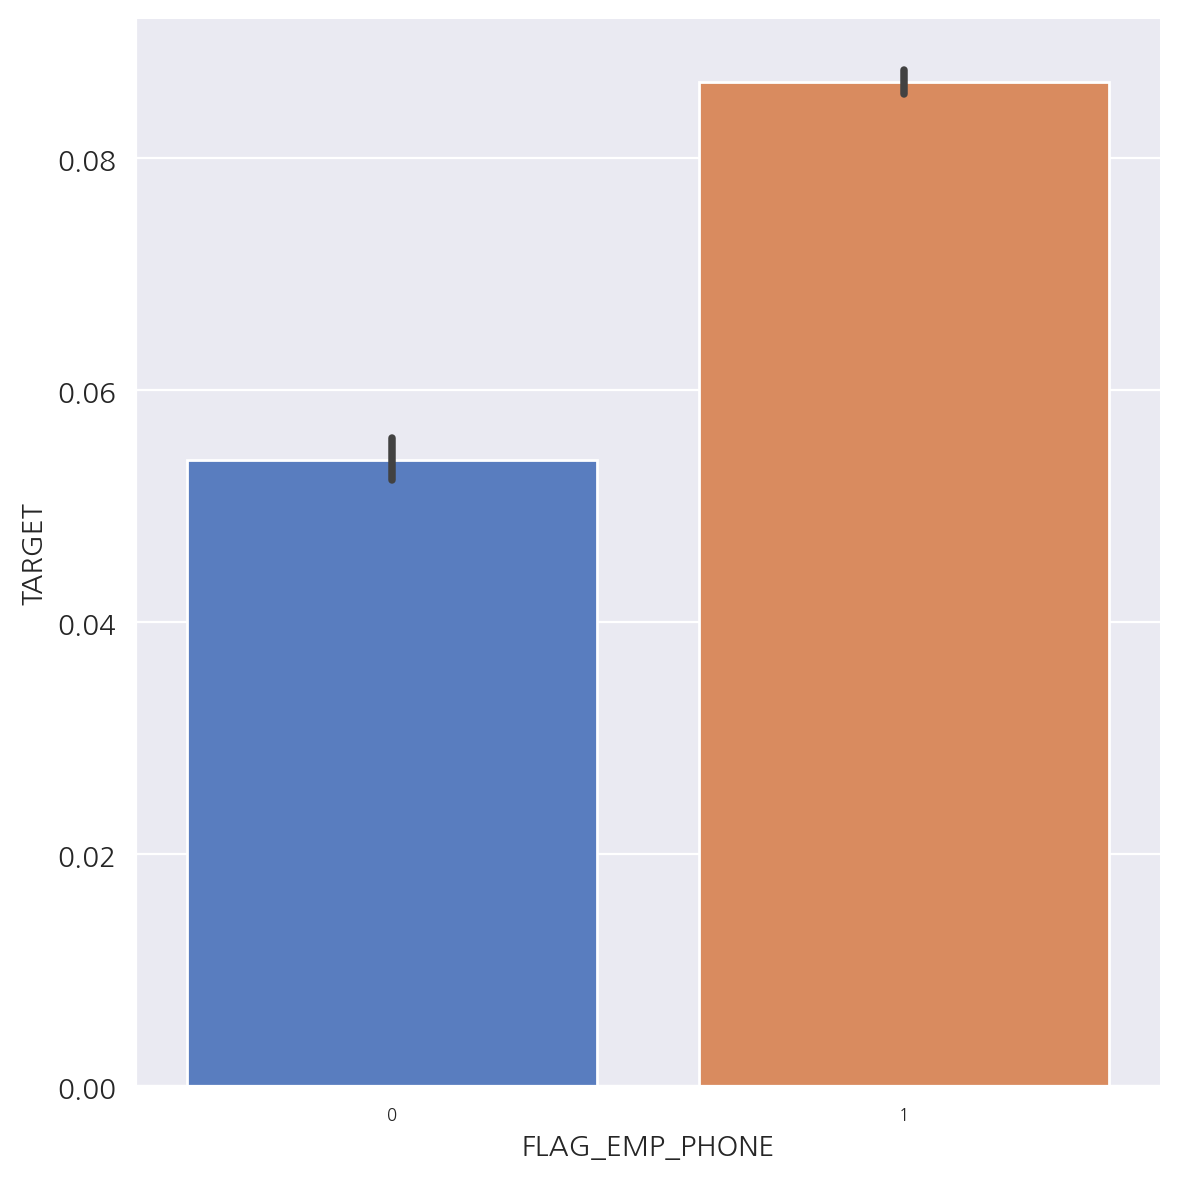

In [28]:
# sns.countplot(temp_train['FLAG_EMP_PHONE'], palette = 'muted')
sns.catplot(x = 'FLAG_EMP_PHONE', y = 'TARGET', data = temp_train, kind = 'bar', height = 6, palette = 'muted')

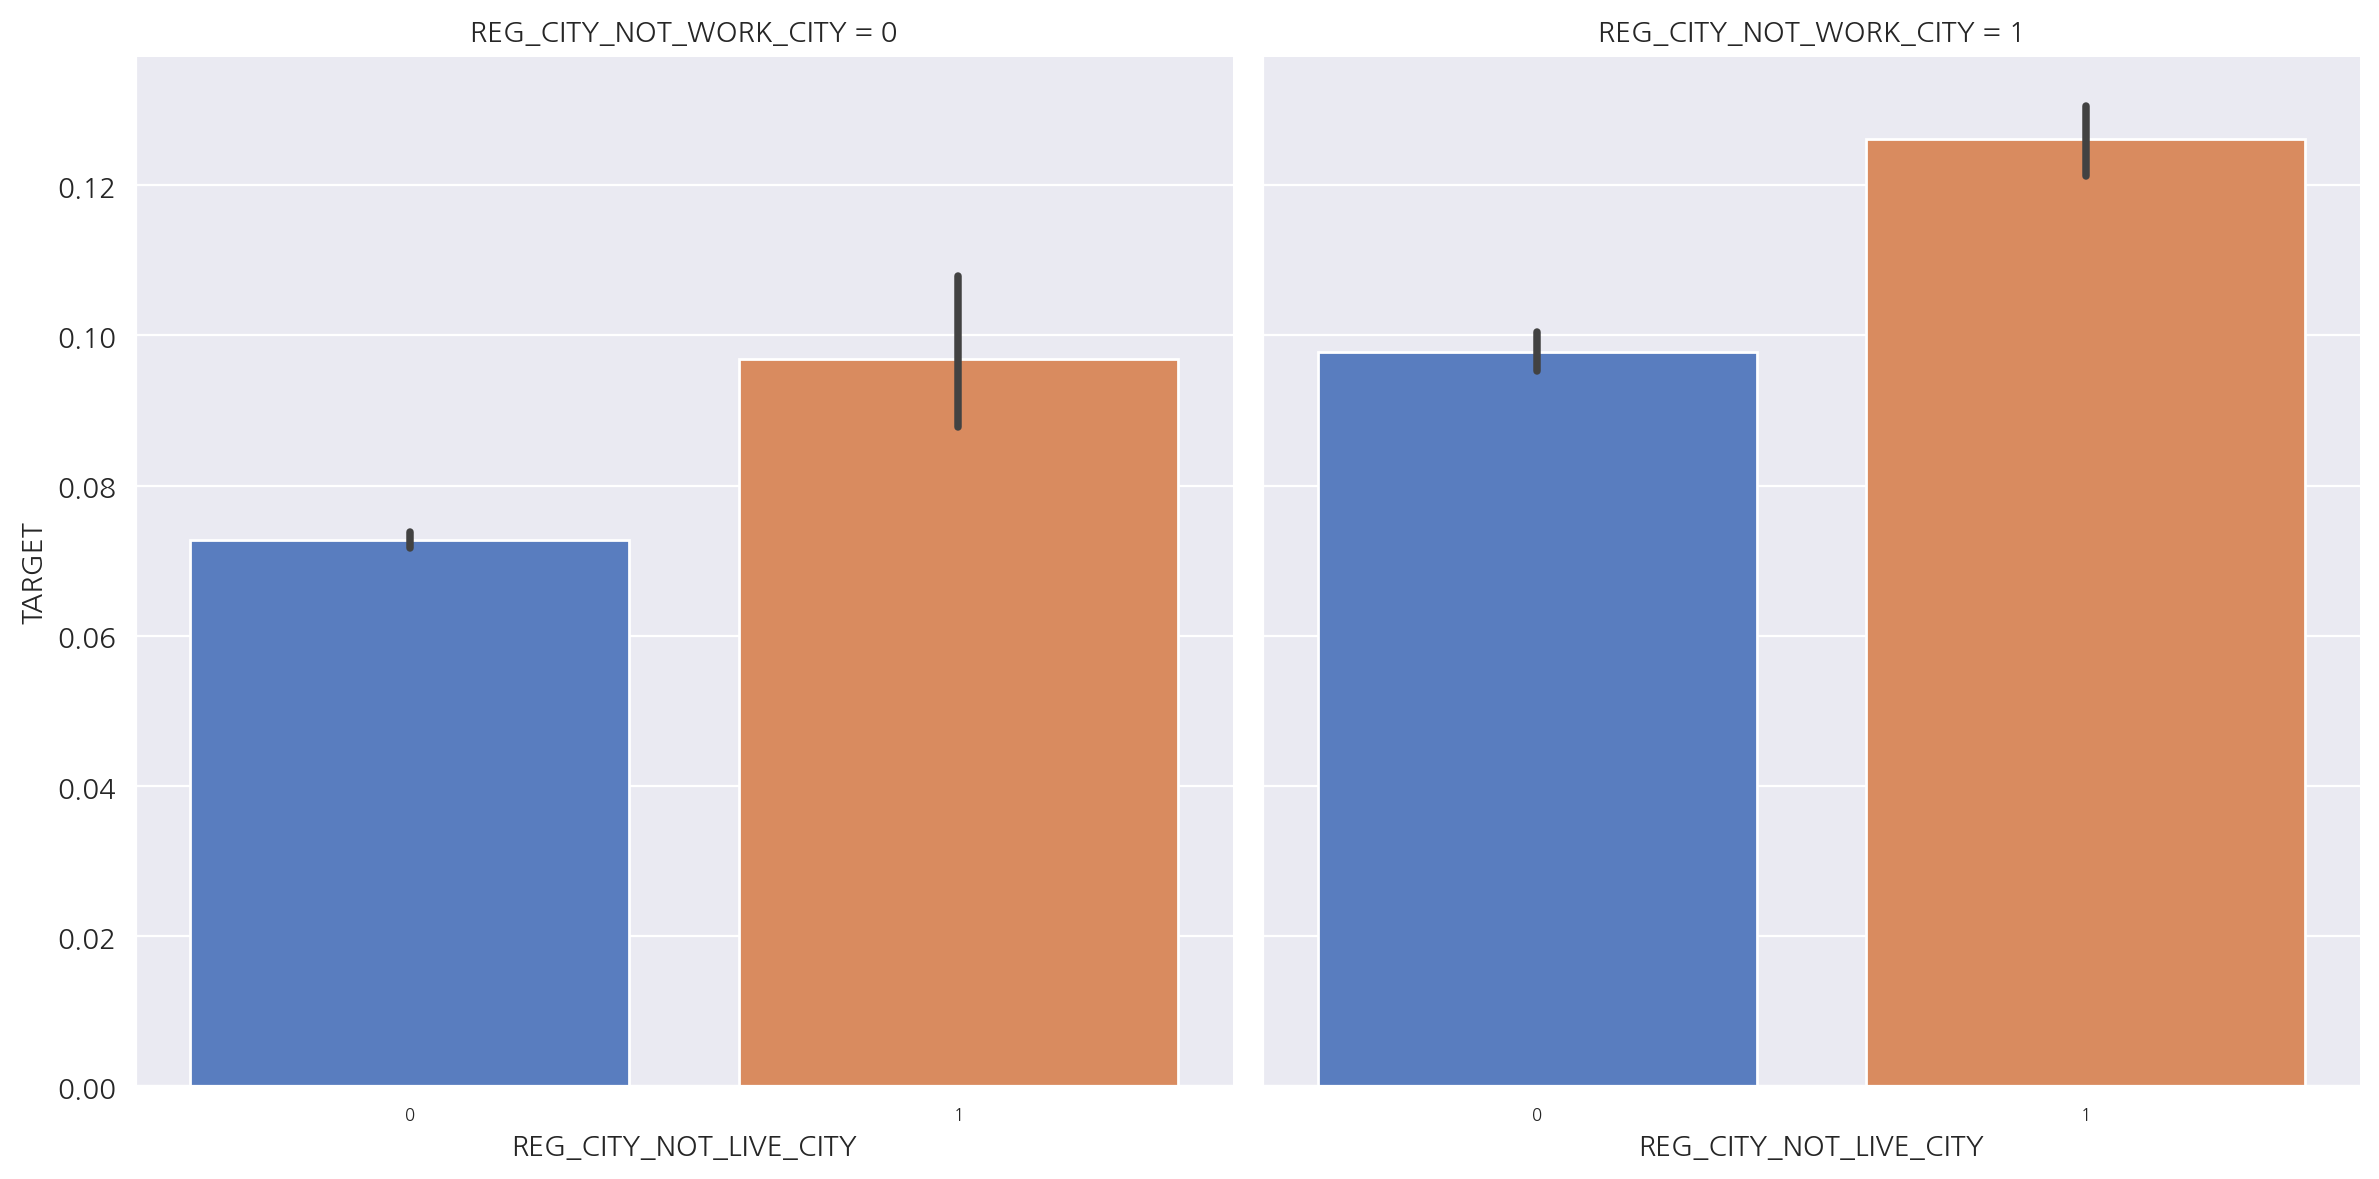

In [29]:
# sns.countplot(temp_train['REG_CITY_NOT_WORK_CITY'], palette = 'muted')
# sns.countplot(temp_train['REG_CITY_NOT_LIVE_CITY'], palette = 'muted')
sns.catplot(x = 'REG_CITY_NOT_LIVE_CITY', y = 'TARGET', data = temp_train, kind = 'bar', col = 'REG_CITY_NOT_WORK_CITY', height = 6, palette = 'muted')

시각화 분석 관찰

1. 나이가 젊을수록 연체
2. 평가가 나쁜 지역, 도시에 살수록 연체
3. 남자일수록 연체
4. 중졸, 고졸이 대출을 자주 이용 // 중졸미만, 중졸, 대학 중퇴는 고졸, 대졸에 비해 연체
5. 실업자, 출산 휴가중인 고객의 연체가 높지만 데이터 수가 매우 적고 표준편차가 크므로 신뢰하기 어려움
6. 직장 번호를 제공할수록 연체 (흥미로운 주제, 직장 번호를 바르게 기입했는지, 실제 다니고있는 직장인지 확인이 어려움)
7. 거주지, 직장 주소가 일치하지 않을수록 연체 (6과 비슷하게 일부러 다르게 기입했을 수 있음)

피처 엔지니어링

In [30]:
domain_df = dataset.copy()

domain_df['SPARE_MONEY'] = domain_df['AMT_GOODS_PRICE'] - domain_df['AMT_CREDIT'] # 여유 자금 : 상품 금액 - 대출 총액
domain_df['INCOME_ANNUITY_PERCENT'] = domain_df['AMT_INCOME_TOTAL'] / domain_df['AMT_CREDIT'] # 소득 대비 대출 비율 = 수입 / 대출 총액
domain_df['CREDIT_TERM'] = domain_df['AMT_ANNUITY'] / domain_df['AMT_CREDIT'] # 갚아야하는 기간 = 매달 내야하는 금액 / 대출 총액
domain_df['DAYS_EMPLOYED_PERCENT'] = domain_df['DAYS_EMPLOYED'] / domain_df['AGE'] # 나이 대비 근무일 수

인코딩

In [31]:
def encoding_scaling (df) :
    le = LabelEncoder()
    le_count = 0

    for col in df:
        if df[col].dtype == 'object':
            if len(list(df[col].unique())) >= 2:
                le.fit_transform(df[col])
                le_count += 1
                
    print('%d columns were label encoded.' % le_count)
    
    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].apply(lambda x : 1 if x == 'Lower secondary' 
                                                                          else 2 if x == 'Secondary / secondary special' 
                                                                          else 3 if x == 'Higher education'
                                                                          else 4 if x == 'Incomplete higher'
                                                                          else 5)

    df = pd.get_dummies(df)

    df['AMT_INCOME_TOTAL'] = boxcox1p(df['AMT_INCOME_TOTAL'], 0.00001) 
    df['AMT_CREDIT'] = boxcox1p(df['AMT_CREDIT'], 0.125) 
    df['AMT_ANNUITY'] = boxcox1p(df['AMT_ANNUITY'], 0.01) 
    df['AMT_GOODS_PRICE'] = boxcox1p(df['AMT_GOODS_PRICE'], 0.3) 
    df['REGION_POPULATION_RELATIVE'] = boxcox1p(df['REGION_POPULATION_RELATIVE'], 0.001) 
    df['DAYS_EMPLOYED'] = boxcox1p(df['DAYS_EMPLOYED'], 0.15) 
    df['DAYS_REGISTRATION'] = boxcox1p(df['DAYS_REGISTRATION'], 0.6) 
    df['DAYS_ID_PUBLISH'] = boxcox1p(df['DAYS_ID_PUBLISH'], 1.75) 
    df['OWN_CAR_AGE'] = boxcox1p(df['OWN_CAR_AGE'], 0.03) 
    df['CNT_FAM_MEMBERS'] = boxcox1p(df['CNT_FAM_MEMBERS'], 0.2) 

    return df

In [32]:
dataset = encoding_scaling(dataset)
domain_df = encoding_scaling(domain_df)

3 columns were label encoded.
3 columns were label encoded.


### 모델링

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
import re

In [34]:
app_train = dataset.iloc[:len(application_train_df),:]
app_test = dataset.iloc[len(application_train_df):,:]

domain_train = domain_df.iloc[:len(application_train_df),:]
domain_test = domain_df.iloc[len(application_train_df):,:]

In [35]:
def lgb_modeling (train, test, target) :
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    train.reset_index(drop = True, inplace = True)
    target.reset_index(drop = True, inplace = True)

    train, test = train.align(test, join = 'inner', axis = 1)

    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    random_state = 14
    n_folds = 5
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = random_state)

    feature_names = list(train.columns)
    train = np.array(train)
    test = np.array(test)
    feature_importance_values = np.zeros(len(feature_names))
    test_predictions = np.zeros(test.shape[0])
    out_of_fold = np.zeros(train.shape[0])
    valid_scores = []
    train_scores = []

    for train_indices, valid_indices in k_fold.split(train) :

        # Training data for the fold
        train_features, train_labels = train[train_indices], target[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train[valid_indices], target[valid_indices]
            
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                    class_weight = 'balanced', learning_rate = 0.05, 
                                    reg_alpha = 0.1, reg_lambda = 0.1, 
                                    subsample = 0.8, n_jobs = -1, random_state = random_state)
            
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                    eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                    eval_names = ['valid', 'train'],
                    early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
            
        # Make predictions
        test_predictions += model.predict_proba(test, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
            
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
            
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        print(valid_score)
        valid_scores.append(valid_score)
        train_scores.append(train_score)
            
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
    
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
        
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
        
    # Overall validation score
    valid_auc = roc_auc_score(target, out_of_fold)
        
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
        
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    return submission, feature_importances, metrics

In [36]:
submission1, feature_importances1, metrics1 = lgb_modeling (app_train, app_test, target)
submission2, feature_importances2, metrics2 = lgb_modeling (domain_train, domain_test, target)

[200]	train's auc: 0.79951	train's binary_logloss: 0.546961	valid's auc: 0.754771	valid's binary_logloss: 0.564609
[400]	train's auc: 0.829587	train's binary_logloss: 0.517048	valid's auc: 0.754554	valid's binary_logloss: 0.546531
0.7551124160789779
[200]	train's auc: 0.79784	train's binary_logloss: 0.548888	valid's auc: 0.762075	valid's binary_logloss: 0.562223
[400]	train's auc: 0.827944	train's binary_logloss: 0.519191	valid's auc: 0.761979	valid's binary_logloss: 0.543832
0.7624033554105151
[200]	train's auc: 0.797623	train's binary_logloss: 0.549173	valid's auc: 0.763294	valid's binary_logloss: 0.563112
0.7633345816234762
[200]	train's auc: 0.798617	train's binary_logloss: 0.548016	valid's auc: 0.756929	valid's binary_logloss: 0.564082
[400]	train's auc: 0.828815	train's binary_logloss: 0.518012	valid's auc: 0.756678	valid's binary_logloss: 0.546386
0.7572171771030319
[200]	train's auc: 0.799481	train's binary_logloss: 0.547229	valid's auc: 0.756313	valid's binary_logloss: 0.56204

In [37]:
metrics1

,fold,train,valid
0,0,0.81586,0.75511
1,1,0.81485,0.76240
2,2,0.79841,0.76333
3,3,0.81527,0.75722
4,4,0.80658,0.75639
5,overall,0.81019,0.75887


In [38]:
metrics2

,fold,train,valid
0,0,0.81308,0.76136
1,1,0.80696,0.77022
2,2,0.81543,0.77180
3,3,0.81539,0.76452
4,4,0.82052,0.76343
5,overall,0.81427,0.76627


In [39]:
submission1.to_csv('lgb_app.csv', index = False)
submission2.to_csv('lgb_app_domain.csv', index = False)

In [40]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

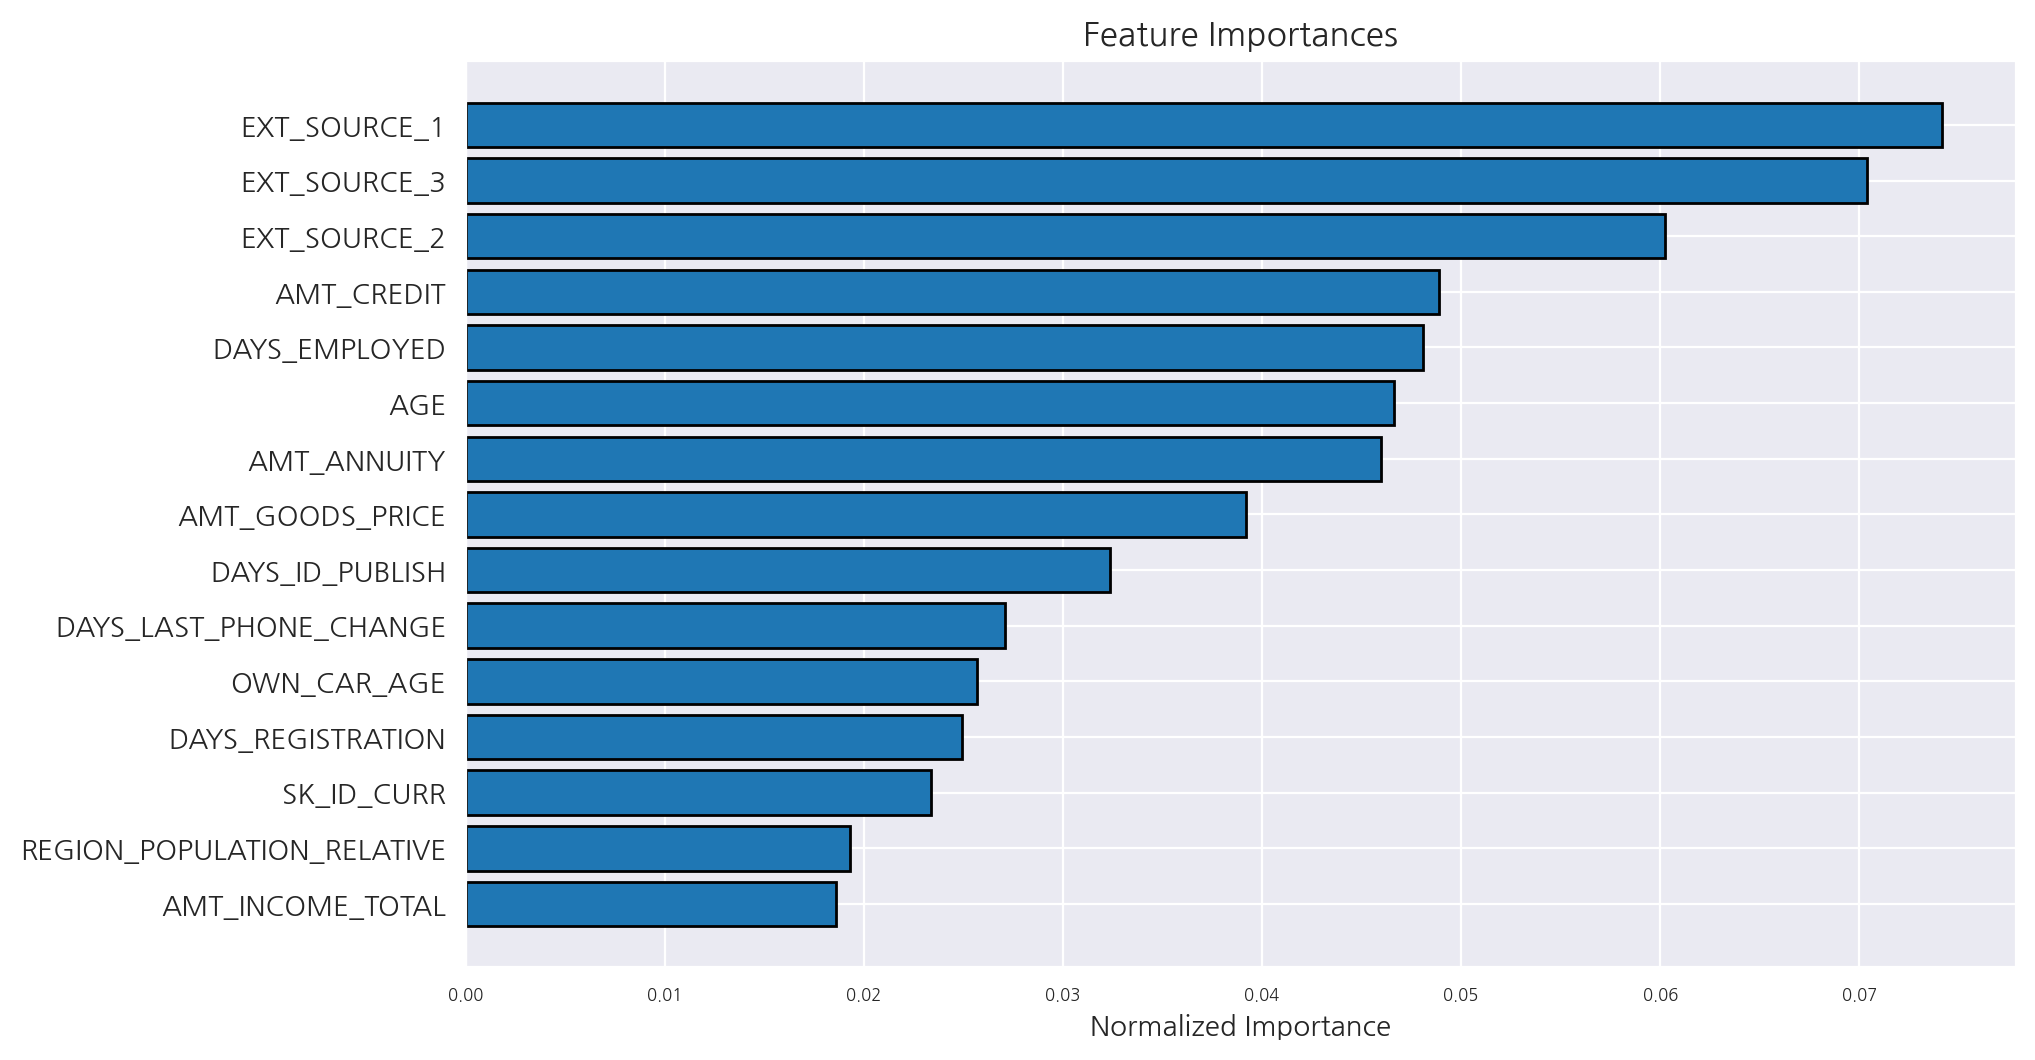

,index,feature,importance,importance_normalized
0,28,EXT_SOURCE_1,604.60000,0.07415
1,30,EXT_SOURCE_3,573.80000,0.07037
2,29,EXT_SOURCE_2,491.40000,0.06026
3,3,AMT_CREDIT,398.60000,0.04888
4,8,DAYS_EMPLOYED,392.20000,0.04810
5,105,AGE,380.00000,0.04660
6,4,AMT_ANNUITY,374.80000,0.04597
7,5,AMT_GOODS_PRICE,319.60000,0.03920
8,10,DAYS_ID_PUBLISH,263.80000,0.03235
9,78,DAYS_LAST_PHONE_CHANGE,220.80000,0.02708


In [41]:
plot_feature_importances(feature_importances1)

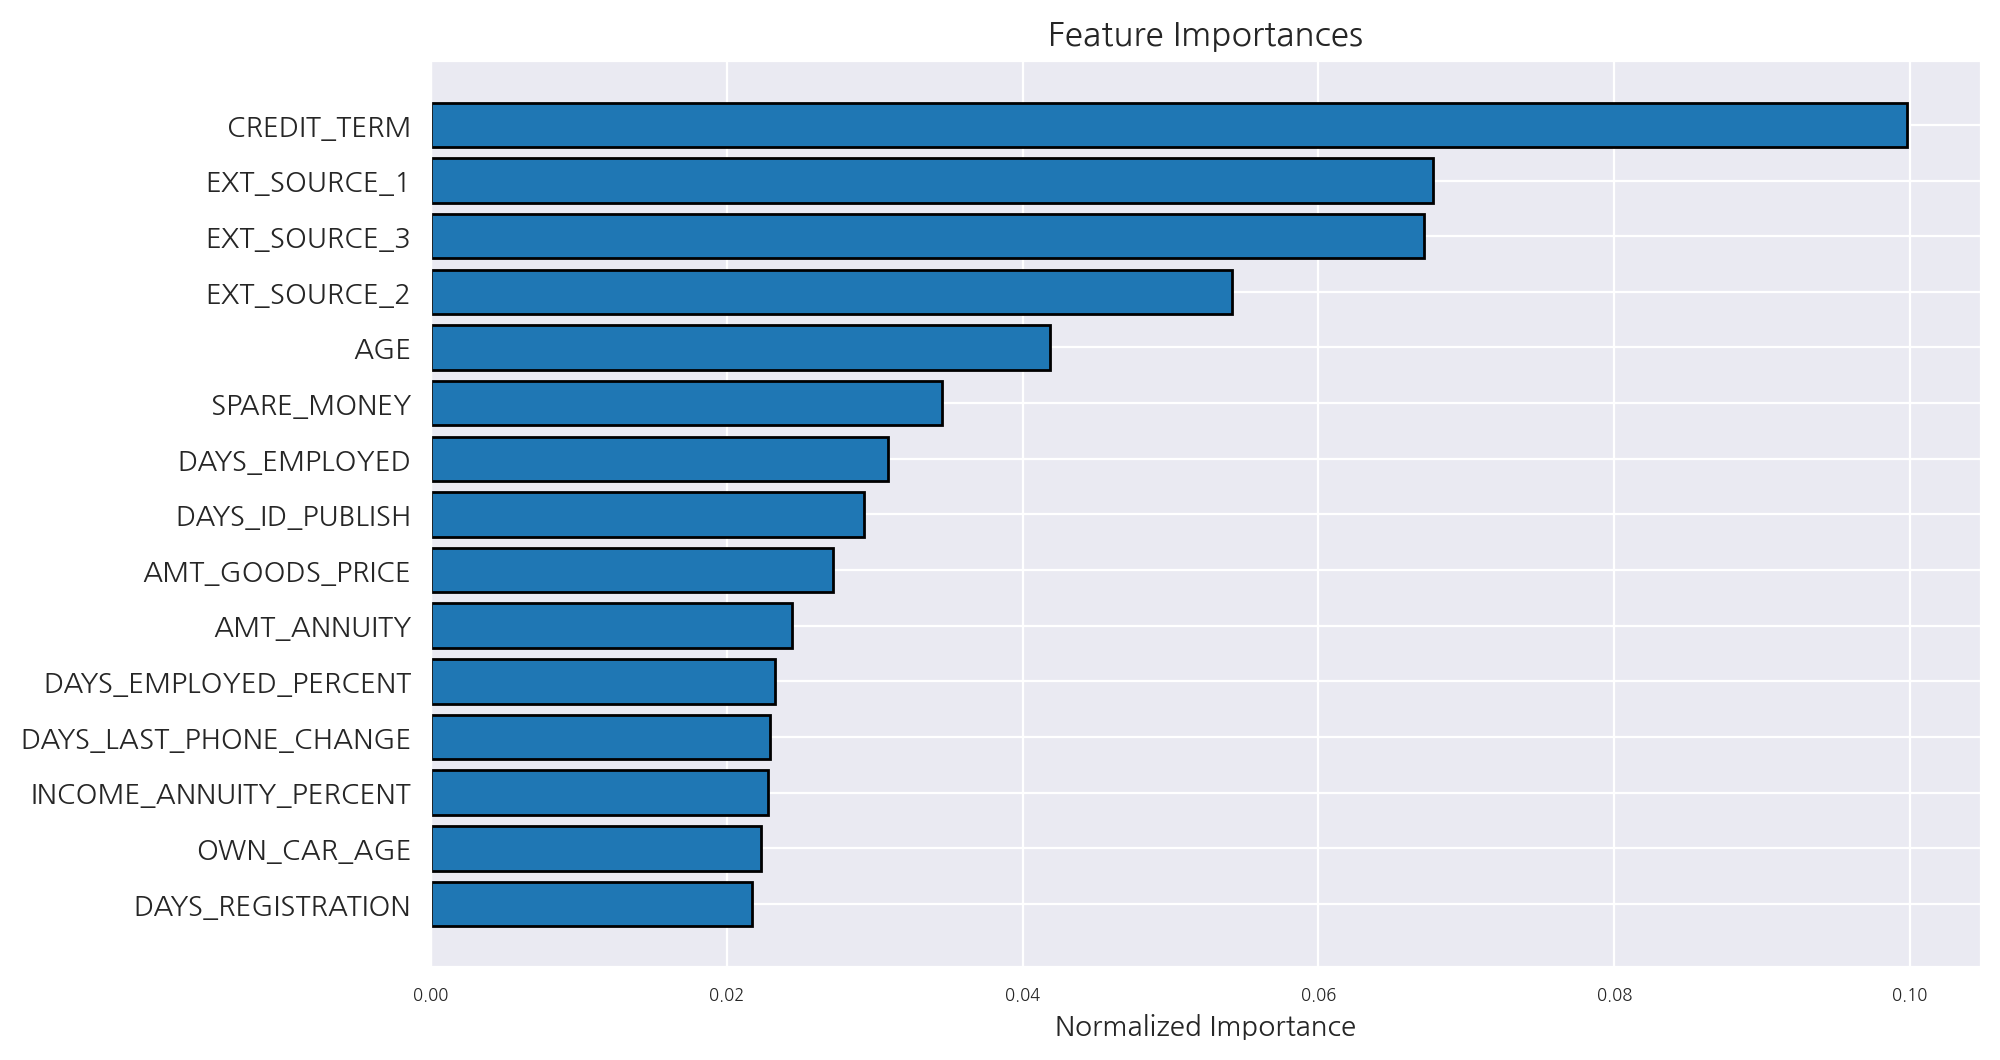

,index,feature,importance,importance_normalized
0,108,CREDIT_TERM,771.20000,0.09979
1,28,EXT_SOURCE_1,523.60000,0.06775
2,30,EXT_SOURCE_3,519.00000,0.06716
3,29,EXT_SOURCE_2,418.40000,0.05414
4,105,AGE,323.60000,0.04187
5,106,SPARE_MONEY,267.00000,0.03455
6,8,DAYS_EMPLOYED,238.80000,0.03090
7,10,DAYS_ID_PUBLISH,226.40000,0.02930
8,5,AMT_GOODS_PRICE,210.20000,0.02720
9,4,AMT_ANNUITY,188.60000,0.02440


In [42]:
plot_feature_importances(feature_importances2)